특성 공학과 규제 다중회귀(mutiple regression): 하나의 특성이 아닌 여러 개의 특성을 사용한 선형 회귀-> 직선이 아닌 평면을 학습한다.특성 공학(feature engineering): '농어 길이 * 농어 높이'를 새로운 특성으로 만드는 것 처럼 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

In [1]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')# perch,bess:농어 
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [2]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(perch_full,perch_weight,random_state=42)

In [4]:
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((42, 3), (14, 3), (42,), (14,))

In [5]:
from sklearn.preprocessing import PolynomialFeatures

#### 다항 회귀(PolynomialFeatures): 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 확장된 특성을 포함한 데이터셋에 선형모델을 훈련시키는 기법
#### 변환기(transformer): 특성을 만들거나 전처리 하기 위해 사이킷런에서 제공하는 클래스

In [6]:
poly=PolynomialFeatures()

In [7]:
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

In [8]:
poly=PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [9]:
poly=PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_input_poly=poly.transform(train_input)
train_input_poly.shape

(42, 9)

In [10]:
poly.get_feature_names()
# r각 특성들이 각각 어떤 입력의 조합으로 만들어졌는지 알수 있다.

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [11]:
test_input_poly=poly.transform(test_input)

In [12]:
from sklearn.linear_model import LinearRegression # 선형 회귀

In [13]:
lr=LinearRegression()
lr.fit(train_input_poly,train_target)
lr.score(train_input_poly, train_target)

0.9903183436982125

In [14]:
lr.score(test_input_poly,test_target)

0.9714559911594155

In [15]:
poly= PolynomialFeatures(degree=5,include_bias=False)
#degree로 필요한 고차항의 최대차수 지정 가능, 5제곱까지 특성을 만듬
poly.fit(train_input)
train_input_poly=poly.transform(train_input)
test_input_poly=poly.transform(test_input)

In [16]:
train_input_poly.shape, test_input_poly.shape

((42, 55), (14, 55))

In [17]:
lr.fit(train_input_poly,train_target)
lr.score(train_input_poly,train_target)

0.9999999999938143

In [18]:
lr.score(test_input_poly,test_target)
#특성을 많이 늘리니가 훈련 세트에 과대적합되므로 테스터 세트에 점수가 현저히 낮다.

-144.40744532797535

#### 규제(regularization): 머신 러닝 모델이 훈련 세트에 과대 적합이 되지 않도록 만드는 것: 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만든다.

다항식의 차수를 감소시키기

선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로서 규제를 가한다. 다른 방법으로 가중치를 제한하는 릿지 회귀, 라쏘 회귀, 엘라스틱넷
1. 릿지 회귀: 학습 알고리즘을 데이터에 맞추는 것 뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 노력하게 된다. 규제항은 훈련하는 동안에만 비용함수에 추가된다. 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지료로 평가된다. 


#### 주의: 일반적으로 훈련하는 동안 사용되는 비용 함수와 테스트에서 사용하는 성능지표는 다르다

2. 라쏘 회귀: 선형 회귀의 또 다른 규제딘 버전, 릿지 회귀처럼 비용 함수에 규제항을 더하지만 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 노름을 사용한다.


#### 특징: 덜 중요한 특성의 가중치를 완전히 제거하려고 한다(즉 가중치가 0이 된다)


3. 엘라스틱넷: 릿지 회귀와 라쏘 회귀의 절충 모델, 규제항은 릿지와 라쏘의 규체항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율(r)을 사용해 조절한다.


#### 사용: 적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 선형 회귀는 피해야한다. 릿지가 기본이 되지만, 실제로 쓰이는 특성이 몇 개 뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다.  특성 수가 훈련 샘플 수 보다 많거나 특성 몇개가 강하게 연관되어 있을 때는 보통 라쏘가 문제르 일으키므로 엘라스틱넷을 선호.




#### analysis-flood.tistory.com/87

In [19]:
from sklearn.preprocessing import StandardScaler
#훈련세트에 완벽하게 학습이 되지만 테스트 세트에 적합하지 안게 되는것을 방지하기 위해 규제가 존재한다 . 머신러닝 모델이 훈련 세트를 
# 과도하게 학습되는 것을 방지한다. 즉 훈련 세트에 과대적합하지 않도록 하느 ㄴ것이다 .이를 가능하게 하는 방법은 특성에 곱해지는 계수의 
#값을 작게 만드는 일.  규제 이전에 특성의 스케일에 대해서 고려해야한다. 각 특성 별로 스켕일이 정규화되지 않으면 특정한 특성 하나가 
#타킷에 매우 많은 영향을 미칠 수 있다. 
ss = StandardScaler()
ss.fit(train_input_poly)
train_scaled = ss.transform(train_input_poly)
test_scaled = ss.transform(test_input_poly)

In [20]:
from sklearn.linear_model import Ridge
# 선형 회귀 모델에 규제를 추가한 모델을 릿지/라쏘 선형회귀라고 부른다. 
# 릿지의 경우 계수를 제곱한 값을 기준으로 규제하고,
# 라쏘의 경우 계수의 절대값을 기준으로 규제한다.
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [21]:
ridge.score(test_scaled, test_target)

0.979069397761539

#### 릿지와 라쏘 모델을 사용할 때 규제의 정도를 임의로 결정할 수 있다. alpha 값으로 조절이 가능한데 이 값과 규제의 정도가 비례하다.
#### 즉, alpha가 커지면 규제가 강해져 과소적합이되고, 작아지면 규제가 적어져 과제적합이 된다.

In [23]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [24]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

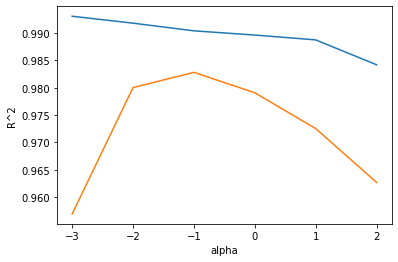

In [25]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha'); plt.ylabel('R^2')
plt.show()

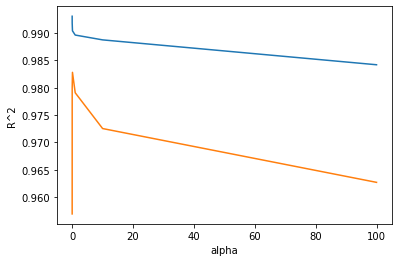

In [26]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha'); plt.ylabel('R^2')
plt.show()

In [27]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570369
0.9827976465386932


In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print()
print(lasso.score(test_scaled, test_target))

0.989789897208096

0.9800593698421884


In [56]:

train_score = []
test_score = []
alpha_liast = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha=alpha, max_iter = 10000)
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\seonwoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792032, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\seonwoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345401393, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


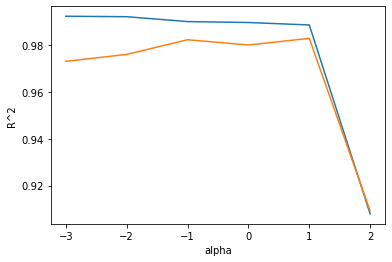

In [57]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha'); plt.ylabel('R^2')
plt.show()

In [58]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [59]:
np.sum(lasso.coef_==0)

40

# 4.1 로지스틱 회귀
#### 두개의 값만들 가지는 종속변수와 독립변수들 간의 인과관계를 로지스틱함수로 이용하여 추정하는 통계기법
#### 로지스틱 회귀분석은 어떤 사건(event)이 발생할지에 대한 직접 예측이 아니라 그 사건이 발생할 확률을 예측하는것

# 로지스틱 회귀모형
#### 반응변수가 범주형 자료(이항/다향)이며. 일반화 선형모형의 특수한 경우로 S형 곡선을 그리는 함수 모형
#### 종속 변수 : 이분형(0또는 1의 값을 가짐)
#### 독립 변수 : 범주형 or 연속형
1. 여러 설명 변수들로부터 두 범주만을 가지는 반응변수를 예측하는데 사용
2. 분석결과 종속변수 값, 즉 확률이 0.5보다 크면 그 사건이 일어나며, 0.5보다 작으면 그 사건이 일어나지 않는 것을 예측

#### 단순회귀분석과 다중회귀분석으로 대표되는 선형 회귀분석은 기본적으로 종속변수와 독립변수 모두 연속형 변수이여야 했으며, 예외적으로 독립변수에 한하여 명목척도를 더미 변수로 변환하여 분석할수가 있었다.
#### 이분형 로지스틱 회귀 분석은 독립변수는 선형회귀분석과 동일하지만 종속변수는 이분형으로 측정된 명목변수로 분석을 하는게 다른 부분

# 독립 변수와 종속 변수의 관계
#### 선형 회귀분석이 말 그대로 독립변수와 종속변수 사이의 선형적 관계를 그래프로 나타낸 것이라면, 로지스틱 회귀 분석은 선형이 아닌 'S'곡선의 특징을 나타낸다.
#### 로지스틱 회귀분석이 곡선에서 종속변수의 확률이 0.5보다 크면 어떤 사건이 일어난다고 보고, 0.5보다 작으면 어떤 사건이 일어나지 않을 것이라고 확률적으로 예측할수있다.

# 오비즈(승산비: Odds Ratio; OR)
#### 오비즈는 확률과 관련된 의미로 P가 주어졌을때 사건이 발생할 확률이 발생하지 않을 확률에 비해 몇배 더 높은가를 의미
#### m.blog.naver.com/y4769/221851780608

In [31]:
import pandas as pd
fish=pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [32]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [34]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [36]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [43]:
fish_target=fish['Species'].to_numpy()

In [45]:
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [46]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)

KNeighborsClassifier(n_neighbors=3)

In [51]:
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [52]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [53]:
kn.predict(test_scaled)

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike', 'Bream', 'Perch', 'Bream', 'Parkki',
       'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch',
       'Smelt', 'Smelt', 'Pike', 'Perch', 'Roach', 'Pike', 'Bream',
       'Perch', 'Roach', 'Perch', 'Parkki', 'Perch'], dtype=object)

In [55]:
proba=kn.predict_proba(test_scaled[:5])#predict_proba는 클래스별 확률값을 반환한다.
np.round(proba,decimals=4)# np.rount()는 기본적으로 소수점 첫째 짜리에서 반올림하지만 decimals에 몇번째 자리까지 표현할지 지정할수있다.

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [56]:
print(proba)

[[0.         0.         1.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.66666667 0.         0.33333333 0.
  0.        ]
 [0.         0.         0.66666667 0.         0.33333333 0.
  0.        ]]


In [60]:
distance,indexes=kn.kneighbors(test_scaled[3:4])
train_target[indexes]
#로지스틱 회귀는 이름만 회귀고 분류모델이다.

array([['Roach', 'Perch', 'Perch']], dtype=object)

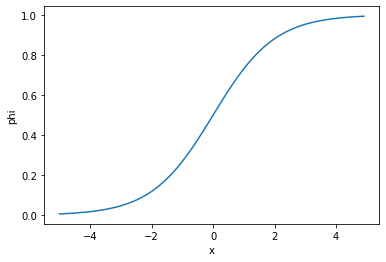

In [61]:
x=np.arange(-5,5,0.1)
phi=1/(1+np.exp(-x))
plt.plot(x,phi)
plt.xlabel('x')
plt.ylabel('phi')
plt.show()

In [62]:
char_arr=np.array(['A','B','C','D','E'])
char_arr[[True,False,True,False,False]]

array(['A', 'C'], dtype='<U1')

In [63]:
bream_smelt_indexes=(train_target=='Bream') |(train_target=='Smelt')
train_bream_smelt=train_scaled[bream_smelt_indexes]
target_bream_smelt=train_target[bream_smelt_indexes]

In [64]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [67]:
lr.predict(train_bream_smelt)

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [69]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [70]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [72]:
lr.coef_,lr.intercept_

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))

In [73]:
# LogisticRegression 클래스는 decision_function()으로 z값을 출력할수있다.
# train_bream_smelt 5개 출력
decisions=lr.decision_function(train_bream_smelt[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

# 로지스틱회귀로 다중 분류하기 (LogisticRegression)
1. max_iter: 반복 횟수 지정(default:100)
2. C: 규제를 제어(alpha 와 반대로 작을수록 규제가 커짐. default:1)

In [77]:
lr=LogisticRegression(C=20,max_iter=1000)

In [78]:
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [79]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [80]:
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [81]:
proba=lr.predict_proba(test_scaled[:5])
np.round(proba,decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [82]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [84]:
lr.coef_.shape,lr.intercept_.shape

((7, 5), (7,))

In [87]:
decision=lr.decision_function(test_scaled[:5])
np.round(decision,decimals=2)

array([[ -6.5 ,   1.03,   5.16,  -2.73,   3.34,   0.33,  -0.63],
       [-10.86,   1.93,   4.77,  -2.4 ,   2.98,   7.84,  -4.26],
       [ -4.34,  -6.23,   3.17,   6.49,   2.36,   2.42,  -3.87],
       [ -0.68,   0.45,   2.65,  -1.19,   3.26,  -5.75,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.11,   3.5 ,  -0.11,  -0.71]])

In [90]:
from scipy.special import softmax
proba=softmax(decision, axis=1)
np.round(proba,decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])